# Confidence Intervals

Today, I will attempt to demystify confidence intervals by relating the concepts we learned to actual data.

Suppose we are interested in the proportion $p$ of the population that exercises regularly. We do not know what the true value of $p$ is.

In [6]:
import numpy as np
import random

p = 0.3 + 0.4 * random.random()

We are going to generate a sample of $n=30$ people, which we will call $S$.

$\hat{p}$ is the proportion of people in our sample who exercise regularly, and although $\hat{p}$ will not be the same as the population proportion $p$, we will use $\hat{p}$ as an estimator of $p$. Here, we produce a sample and calculate $\hat{p}$ for the sample:

In [7]:
# Number of people in our sample.
n = 30

# Generate the sample.
s = [1 if random.random() < p else 0 for _ in range(n)]
print("Our sample:")
print(s)
print()

# This is the number of people who exercise regularly (in our sample).
print("Number of people who exercise regularly:")
print(sum(s))
print()

# This is the proportion of people who exercise regularly (in our sample).
print("Proportion of people who exercise regularly:")
print(sum(s) / n)

Our sample:
[0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1]

Number of people who exercise regularly:
18

Proportion of people who exercise regularly:
0.6


## Question 1

Now, if we are going to use $\hat{p}$ as an estimator of $p$, then we want $\mathbb{E}[\hat{p}] = p$. Prove that $\mathbb{E}[\hat{p}] = p$.

Let's check if this is true by generating many samples, just like $S$.

In [8]:
# Number of samples generated.
N = 10000

# Generate the samples.
samples = [
    [1 if random.random() < p else 0 for _ in range(n)] for _ in range(N)
]

# Calculate the average value of p_hat.
p_hat_values = [sum(sample) / n for sample in samples]
avg_p_hat = np.mean(p_hat_values)
print("The difference between the average of the p_hat values and p was:")
print(abs(avg_p_hat - p))

The difference between the average of the p_hat values and p was:
0.000731287906244


## Question 2

We can see that $\hat{p}$ is an unbiased estimator of $p$.

Calculate $\operatorname{var} \hat{p}$.

## Answer 2

Let $X_i$ be the indicator that the $i$th person in a sample exercises regularly. Then, $\operatorname{var}\hat{X_i} = p(1-p)$ and we have
$$ \operatorname{var}\hat{p} = \operatorname{var}\left(\frac{X_1 + \cdots + X_n}{n}\right) = \frac{np(1-p)}{n^2} = \frac{p(1-p)}{n}. $$

We can now plot the $\textit{sampling distribution}$ of $\hat{p}$, that is, the probability distribution of $\hat{p}$, using the samples we have gathered.

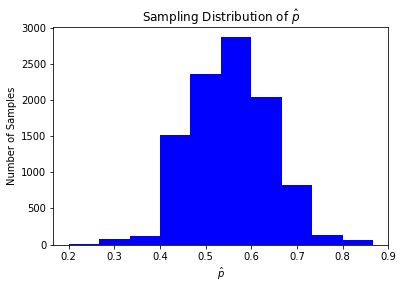

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(p_hat_values, 10, facecolor="blue")
plt.xlabel(r"$\hat{p}$")
plt.ylabel("Number of Samples")
plt.title(r"Sampling Distribution of $\hat{p}$")
plt.show()

## Question 3

The sampling distribution is centered around $p$, as we have already seen.

Now, we use Chebyshev's Inequality to construct some confidence intervals. Suppose we want a tolerance of $10\%$, that is, we would like $\hat{p}$ to be within $\pm 10\%$ of the true value $p$.

What is a lower bound on the probability that a confidence interval captures the true parameter $p$? Use Chebyshev's inequality.

## Answer 3

We compute
$$ \mathbb{P}(|\hat{p} - p| \geq 0.1) \leq \frac{\operatorname{var}\hat{p}}{0.1^2} = \frac{p(1-p)}{0.01 n}. $$

Since $p(1-p) \leq 1/4$, setting $n=30$ means that we expect
$$ \mathbb{P}(|\hat{p} - p| \geq 0.1) \leq \frac{1}{4 \cdot 0.01 \cdot 30} = 0.833. $$

Flipping the inequality around shows that
$$ \mathbb{P}(|\hat{p} - p| \leq 0.1) \geq 1-0.833 = 0.167. $$

What this means: for each of the $10000$ samples we generated, we calculate $\hat{p}$. Then, we construct the interval $(\hat{p} - 0.1, \hat{p} + 0.1)$ for each sample, and we expect at least a fraction $0.167$ of the confidence intervals to contain the true population parameter $p$. Actually, since we used Chebyshev's Inequality, which is just a bound, we expect many more of the confidence intervals to contain $p$.

In [10]:
# How many of the confidence intervals contain p?
ci_containing_p = [
    1 if p_hat - 0.1 < p < p_hat + 0.1 else 0 for p_hat in p_hat_values
]
num_ci_containing_p = sum(ci_containing_p)
fraction_ci_containing_p = num_ci_containing_p / N
print("The fraction of confidence intervals that contain p is:")
print(fraction_ci_containing_p)

The fraction of confidence intervals that contain p is:
0.7258


Clearly Chebyshev's Inequality is a very weak bound! With the CLT, we can derive a much better approximation.

# Central Limit Theorem

## Question 4

Using the CLT, approximate the probability that a confidence interval captures $p$.

## Answer 4

The number of samples we have, $30$, is large enough that we expect
$$
\frac{\sqrt{n} (\hat{p} - p)}{\sqrt{p(1-p)}} \sim \mathcal{N}(0, 1).
$$
Again, with the estimate $p(1-p) \leq 1/4$, the standard deviation is bounded by $(1/2)/\sqrt{n}$. Hence,
\begin{align*}
\mathbb{P}\!\left( |\hat{p} - p| \geq 0.1\right) &\leq \mathbb{P}\!\left( \frac{\sqrt{n}|\hat{p} - p|}{1/2} \geq 2 \cdot 0.1 \cdot \sqrt{n} \right) \\
%\intertext{We evaluate $4 \cdot 0.1 \cdot \sqrt{n} \approx 1.1$, so}
&\approx 2\Phi(-2 \cdot 0.1 \cdot \sqrt{30}) = 2\Phi(-1.1) = 0.273.
\end{align*}
The probability that $p$ is captured by one of our confidence intervals is
$$
\mathbb{P}\!\left( |\hat{p} - p| \geq 0.1\right) \approx 1 - 0.273 = 0.727.
$$
This number agrees very closely with our experiments, indicating that the CLT is a very good approximation here!